In [20]:
import PyPDF2
from PIL import Image
from io import BytesIO
import pytesseract #pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR'
import re

In [2]:
# open('cliftontimes-Issue_30_2023.pdf', 'rb') as pdf_file:
#     pdf_reader = PyPDF2.PdfReader(pdf_file)

pdf_file = open('cliftontimes-Issue_30_2023.pdf', 'rb')
pdf_reader = PyPDF2.PdfReader(pdf_file)

In [3]:
len(pdf_reader.pages)

12

In [4]:
page_4 = pdf_reader.pages[3] # page 4 with index 3
page_4

{'/Type': '/Page',
 '/MediaBox': [0, 0, 792, 1116],
 '/Parent': {'/Type': '/Pages',
  '/Kids': [IndirectObject(4, 0, 1883087189264),
   IndirectObject(22, 0, 1883087189264),
   IndirectObject(27, 0, 1883087189264),
   IndirectObject(32, 0, 1883087189264),
   IndirectObject(37, 0, 1883087189264),
   IndirectObject(42, 0, 1883087189264),
   IndirectObject(47, 0, 1883087189264),
   IndirectObject(52, 0, 1883087189264),
   IndirectObject(57, 0, 1883087189264),
   IndirectObject(62, 0, 1883087189264),
   IndirectObject(67, 0, 1883087189264),
   IndirectObject(72, 0, 1883087189264)],
  '/Count': 12},
 '/Resources': {'/ProcSet': ['/PDF', '/ImageC'],
  '/XObject': {'/R35': {'/Subtype': '/Image',
    '/ColorSpace': '/DeviceRGB',
    '/Width': 1576,
    '/Height': 2288,
    '/BitsPerComponent': 8,
    '/Filter': '/DCTDecode'}}},
 '/Contents': {'/Filter': '/FlateDecode'},
 '/CropBox': [0, 0, 792, 1116],
 '/TrimBox': [0, 0, 792, 1116]}

In [5]:
resources = page_4['/Resources']
xObject = resources['/XObject'].get_object()
xObject

{'/R35': {'/Subtype': '/Image',
  '/ColorSpace': '/DeviceRGB',
  '/Width': 1576,
  '/Height': 2288,
  '/BitsPerComponent': 8,
  '/Filter': '/DCTDecode'}}

In [6]:
img = xObject['/R35']['/Subtype']
img

'/Image'

In [7]:
data = xObject['/R35']._data

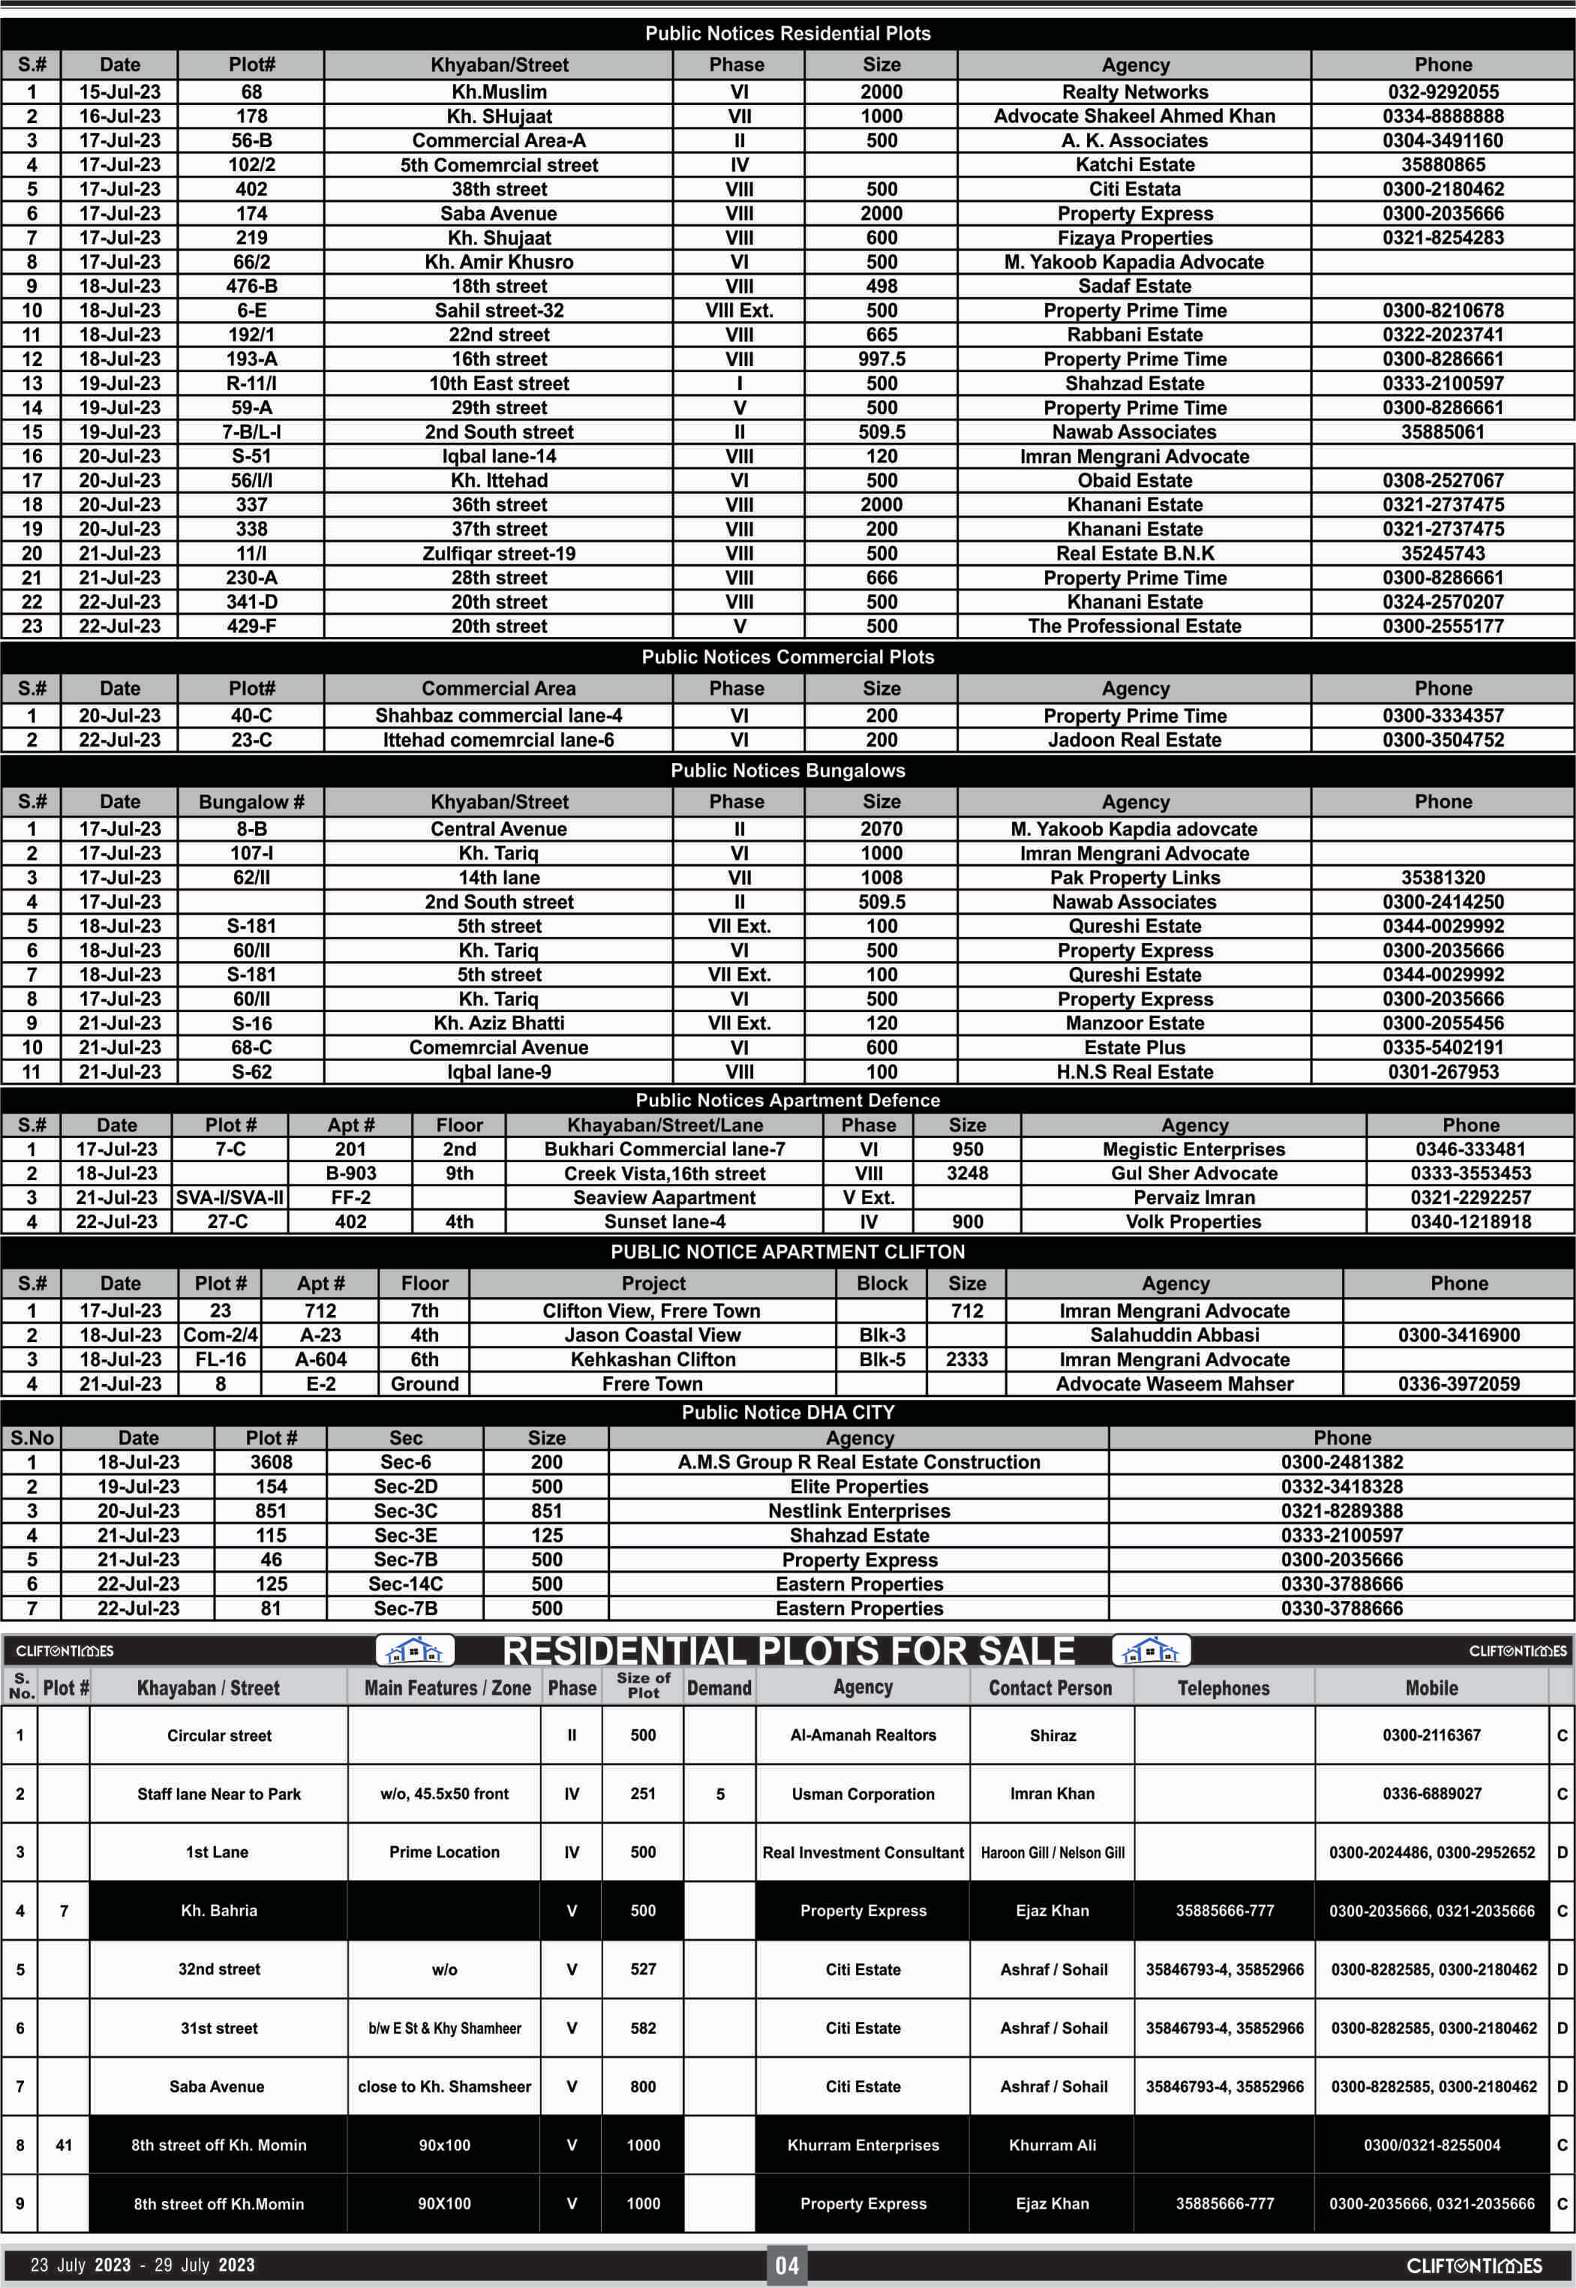

In [8]:
image = Image.open(BytesIO(data)) # Convert image data to PIL image
image

In [9]:
extracted_images = []

for page_num in range(4, 8): # page 5 to 8 with index 4 to 7
    page = pdf_reader.pages[page_num]
    resources = page['/Resources']
    xObject = resources['/XObject'].get_object()

    # Iterate through all the objects
    for obj in xObject:
        if xObject[obj]['/Subtype'] == '/Image':
            data = xObject[obj]._data
            image = Image.open(BytesIO(data)) # Convert image data to PIL image
            extracted_images.append(image)

In [10]:
len(extracted_images)

4

In [11]:
# Extract text from the images using pytesseract
extracted_texts = []
for image in extracted_images:
    text = pytesseract.image_to_string(image)
    extracted_texts.append(text)

In [12]:
extracted_texts

['CLIFTONTICNES\n\nESIDENTIAL PLOTS FOR SALI\n\nCLIFTONTICNES\n\nNod Plot # Khayaban | Street Main Features /Zone Phase suse * Demand Agency Contact Person Telephones Mobile\ndivided, reasonable 1030 | 1 Tabani Real Estate Hammad Qudsi 0300-2117764\n4th street/Kh. Badban corner Vv 1033 | Khurram Enterprises Khurram Ali | 0300/0321-8255004\n26th street Vv 2000 || Property Express Ejaz Khan | 35885666-777 0300-2035666, 0321-2035666\nGizri street-5/Kh. Jabal Vv 3800 |_| Khurram Enterprises Khurram Ali 0300/0321-8255004\n14 Khy Badban wio v | 500 Citi Estate Ashraf /Sohail | 35846793-4, 35852966 | 0300-8262585, 0300-2180462 | D\n15 31st street wio vie | 500 Citi Estate Ashraf/Sohail | 35846793-4, 35852966 | 0300-8282585, 0300-2180462 | D\n16 26th street off Kh. Hilal Full White vi | 500 | 625 Clifton Property Zeeshan Khurshid 0300-2484452 c\n17 Kh. Ameer Khusro Rear Plot vi | 500 Land Express Saqib Ejaz 0321-8258834 C\n48 Off Kh. Rahat / Sth street wio vi | 500 Mahenti Estate iftikhar / Us

In [13]:
combined_text = "\n".join(extracted_texts)
combined_text[:1000]  

'CLIFTONTICNES\n\nESIDENTIAL PLOTS FOR SALI\n\nCLIFTONTICNES\n\nNod Plot # Khayaban | Street Main Features /Zone Phase suse * Demand Agency Contact Person Telephones Mobile\ndivided, reasonable 1030 | 1 Tabani Real Estate Hammad Qudsi 0300-2117764\n4th street/Kh. Badban corner Vv 1033 | Khurram Enterprises Khurram Ali | 0300/0321-8255004\n26th street Vv 2000 || Property Express Ejaz Khan | 35885666-777 0300-2035666, 0321-2035666\nGizri street-5/Kh. Jabal Vv 3800 |_| Khurram Enterprises Khurram Ali 0300/0321-8255004\n14 Khy Badban wio v | 500 Citi Estate Ashraf /Sohail | 35846793-4, 35852966 | 0300-8262585, 0300-2180462 | D\n15 31st street wio vie | 500 Citi Estate Ashraf/Sohail | 35846793-4, 35852966 | 0300-8282585, 0300-2180462 | D\n16 26th street off Kh. Hilal Full White vi | 500 | 625 Clifton Property Zeeshan Khurshid 0300-2484452 c\n17 Kh. Ameer Khusro Rear Plot vi | 500 Land Express Saqib Ejaz 0321-8258834 C\n48 Off Kh. Rahat / Sth street wio vi | 500 Mahenti Estate iftikhar / Usm

In [14]:
lines = combined_text.split("\n")
lines

['CLIFTONTICNES',
 '',
 'ESIDENTIAL PLOTS FOR SALI',
 '',
 'CLIFTONTICNES',
 '',
 'Nod Plot # Khayaban | Street Main Features /Zone Phase suse * Demand Agency Contact Person Telephones Mobile',
 'divided, reasonable 1030 | 1 Tabani Real Estate Hammad Qudsi 0300-2117764',
 '4th street/Kh. Badban corner Vv 1033 | Khurram Enterprises Khurram Ali | 0300/0321-8255004',
 '26th street Vv 2000 || Property Express Ejaz Khan | 35885666-777 0300-2035666, 0321-2035666',
 'Gizri street-5/Kh. Jabal Vv 3800 |_| Khurram Enterprises Khurram Ali 0300/0321-8255004',
 '14 Khy Badban wio v | 500 Citi Estate Ashraf /Sohail | 35846793-4, 35852966 | 0300-8262585, 0300-2180462 | D',
 '15 31st street wio vie | 500 Citi Estate Ashraf/Sohail | 35846793-4, 35852966 | 0300-8282585, 0300-2180462 | D',
 '16 26th street off Kh. Hilal Full White vi | 500 | 625 Clifton Property Zeeshan Khurshid 0300-2484452 c',
 '17 Kh. Ameer Khusro Rear Plot vi | 500 Land Express Saqib Ejaz 0321-8258834 C',
 '48 Off Kh. Rahat / Sth str

In [15]:
filtered_lines = [line for line in lines if len(line) > 10]
filtered_lines

['CLIFTONTICNES',
 'ESIDENTIAL PLOTS FOR SALI',
 'CLIFTONTICNES',
 'Nod Plot # Khayaban | Street Main Features /Zone Phase suse * Demand Agency Contact Person Telephones Mobile',
 'divided, reasonable 1030 | 1 Tabani Real Estate Hammad Qudsi 0300-2117764',
 '4th street/Kh. Badban corner Vv 1033 | Khurram Enterprises Khurram Ali | 0300/0321-8255004',
 '26th street Vv 2000 || Property Express Ejaz Khan | 35885666-777 0300-2035666, 0321-2035666',
 'Gizri street-5/Kh. Jabal Vv 3800 |_| Khurram Enterprises Khurram Ali 0300/0321-8255004',
 '14 Khy Badban wio v | 500 Citi Estate Ashraf /Sohail | 35846793-4, 35852966 | 0300-8262585, 0300-2180462 | D',
 '15 31st street wio vie | 500 Citi Estate Ashraf/Sohail | 35846793-4, 35852966 | 0300-8282585, 0300-2180462 | D',
 '16 26th street off Kh. Hilal Full White vi | 500 | 625 Clifton Property Zeeshan Khurshid 0300-2484452 c',
 '17 Kh. Ameer Khusro Rear Plot vi | 500 Land Express Saqib Ejaz 0321-8258834 C',
 '48 Off Kh. Rahat / Sth street wio vi | 50

In [16]:
valid_lines = [line for line in filtered_lines if any(char.isdigit() for char in line)]

valid_lines    

['divided, reasonable 1030 | 1 Tabani Real Estate Hammad Qudsi 0300-2117764',
 '4th street/Kh. Badban corner Vv 1033 | Khurram Enterprises Khurram Ali | 0300/0321-8255004',
 '26th street Vv 2000 || Property Express Ejaz Khan | 35885666-777 0300-2035666, 0321-2035666',
 'Gizri street-5/Kh. Jabal Vv 3800 |_| Khurram Enterprises Khurram Ali 0300/0321-8255004',
 '14 Khy Badban wio v | 500 Citi Estate Ashraf /Sohail | 35846793-4, 35852966 | 0300-8262585, 0300-2180462 | D',
 '15 31st street wio vie | 500 Citi Estate Ashraf/Sohail | 35846793-4, 35852966 | 0300-8282585, 0300-2180462 | D',
 '16 26th street off Kh. Hilal Full White vi | 500 | 625 Clifton Property Zeeshan Khurshid 0300-2484452 c',
 '17 Kh. Ameer Khusro Rear Plot vi | 500 Land Express Saqib Ejaz 0321-8258834 C',
 '48 Off Kh. Rahat / Sth street wio vi | 500 Mahenti Estate iftikhar / Usman 0300-2638925, 0300-8221566 | C',
 '19 Kh. Tariq upto, Kh. Shaheen vi | 500 Mahenti Estate Iftikhar / Usman 0300-2638925, 0300-82156 a',
 '20 Kh. 

In [17]:
# extract phone numbers
def extract_phone_numbers(text):
    phone_numbers = re.findall(r'\d{4}[-.\s]?\d{7}|\d{3}[-.\s]?\d{7}|\d{4}[-.\s]?\d{6}', text)
    return phone_numbers

In [18]:
plots = []
streets = []
features = []
sizes = []
agencies = []
contacts = []
telephones = []
mobiles = []

In [21]:
for line in valid_lines:
    parts = line.split()
    
    
    plot_num = parts[0] if parts[0].isdigit() else None
    size = next((part for part in parts if "500" in part or "600" in part or "1000" in part), None)
    phone_numbers = extract_phone_numbers(line)
    
   
    if size and phone_numbers:
        size_index = parts.index(size)
        plots.append(plot_num)
        streets.append(" ".join(parts[1:size_index]))
        sizes.append(size)
        
        # Safely determine agency names
        agency_name_parts = parts[size_index+1:]
        for num in phone_numbers:
            if num in agency_name_parts:
                agency_name_parts.remove(num)
        agencies.append(" ".join(agency_name_parts))
        
        telephones.append(phone_numbers[0])
        mobiles.append(phone_numbers[1] if len(phone_numbers) > 1 else None)
        contacts.append(None)  
        features.append(None)  
    else:
        plots.append(None)
        streets.append(None)
        features.append(None)
        sizes.append(None)
        agencies.append(None)
        contacts.append(None)
        telephones.append(None)
        mobiles.append(None)

# Display the first few records for review
list(zip(plots, streets, features, sizes, agencies, contacts, telephones, mobiles))[:20]


[(None, None, None, None, None, None, None, None),
 (None,
  'street/Kh. Badban corner Vv 1033 | Khurram Enterprises Khurram Ali |',
  None,
  '0300/0321-8255004',
  '',
  None,
  '0321-8255004',
  None),
 (None, None, None, None, None, None, None, None),
 (None,
  'street-5/Kh. Jabal Vv 3800 |_| Khurram Enterprises Khurram Ali',
  None,
  '0300/0321-8255004',
  '',
  None,
  '0321-8255004',
  None),
 ('14',
  'Khy Badban wio v |',
  None,
  '500',
  'Citi Estate Ashraf /Sohail | 35846793-4, 35852966 | 0300-8262585, | D',
  None,
  '0300-8262585',
  '0300-2180462'),
 ('15',
  '31st street wio vie |',
  None,
  '500',
  'Citi Estate Ashraf/Sohail | 35846793-4, 35852966 | 0300-8282585, | D',
  None,
  '0300-8282585',
  '0300-2180462'),
 ('16',
  '26th street off Kh. Hilal Full White vi |',
  None,
  '500',
  '| 625 Clifton Property Zeeshan Khurshid c',
  None,
  '0300-2484452',
  None),
 ('17',
  'Kh. Ameer Khusro Rear Plot vi |',
  None,
  '500',
  'Land Express Saqib Ejaz C',
  None,
 

In [22]:
import pandas as pd
# Create a dataframe using a dictionary
df = pd.DataFrame({
    'Plot': plots,
    'Street': streets,
    'Features': features,
    'Size': sizes,
    'Agency': agencies,
    'Contact': contacts,
    'Telephone': telephones,
    'Mobile': mobiles
})

# Display the first few rows of the dataframe
print(df.head(20))

    Plot                                             Street Features   
0   None                                               None     None  \
1   None  street/Kh. Badban corner Vv 1033 | Khurram Ent...     None   
2   None                                               None     None   
3   None  street-5/Kh. Jabal Vv 3800 |_| Khurram Enterpr...     None   
4     14                                 Khy Badban wio v |     None   
5     15                              31st street wio vie |     None   
6     16          26th street off Kh. Hilal Full White vi |     None   
7     17                    Kh. Ameer Khusro Rear Plot vi |     None   
8     48                Off Kh. Rahat / Sth street wio vi |     None   
9     19                   Kh. Tariq upto, Kh. Shaheen vi |     None   
10    20                Kh. Muhafiz & 4th Street Corner vie     None   
11  None                    Kh. Ameer Khusro Real Plot vi |     None   
12     2                                    tet street vi |     

In [23]:
# df.head(20)

In [24]:
df[5:]

,Plot,Street,Features,Size,Agency,Contact,Telephone,Mobile
5,15,31st street wio vie |,None,500,"Citi Estate Ashraf/Sohail | 35846793-4, 358529...",None,0300-8282585,0300-2180462
6,16,26th street off Kh. Hilal Full White vi |,None,500,| 625 Clifton Property Zeeshan Khurshid c,None,0300-2484452,None
7,17,Kh. Ameer Khusro Rear Plot vi |,None,500,Land Express Saqib Ejaz C,None,0321-8258834,None
8,48,Off Kh. Rahat / Sth street wio vi |,None,500,"Mahenti Estate iftikhar / Usman 0300-2638925, | C",None,0300-2638925,0300-8221566
9,19,"Kh. Tariq upto, Kh. Shaheen vi |",None,500,"Mahenti Estate Iftikhar / Usman 0300-2638925, ...",None,0300-2638925,None
...,...,...,...,...,...,...,...,...
144,147,Sahil street-35 Vill Ext.,None,500,"Parekh Estate Wagas/Fayyaz/Bilal 0321-2323646,",None,0345-2272171,0321-2323646
145,None,Sahil Street-21 Zone-D Vill Ext.,None,500,Real Investment Consultant | Haroon Gill / Nel...,None,0300-2024486,0300-2952652
146,None,None,None,None,None,None,None,None
147,150,Sahil street-20 wlo vinExt),None,500,| 4.15.F Sadaf Estate Haris Mecpool) 0334-3778...,None,0334-3778931,0300-3661891
